## Importing Libraries

In [89]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-dataset/diabetes.csv


## Data Preperation

In [90]:
df = pd.read_csv("../input/diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
df.shape

(768, 9)

## Data Cleaning

In [93]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Set Independent and Dependent Values

In [96]:
selected_features = {'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'}
selected_features

{'BMI',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'Glucose',
 'Insulin',
 'Pregnancies',
 'SkinThickness'}

In [97]:
X = df[selected_features] # Independent Values
y = df['Outcome'] # Targeted Values Selection

## Splitting the dataset into the Training set and Test set

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Feature Scaling

In [99]:
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Create Model LVQ

In [100]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [101]:
n_input = X_train.shape[1]
n_output = len(np.unique(y_train))

print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 7
Output Neuron: 2


In [102]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, learning_rate, fungsi_pembelajaran):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = learning_rate
        self.fungsi_pembelajaran = fungsi_pembelajaran
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """

        weight_label, label_index = np.unique(train_target, True)

        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float)

        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        
        while epoch <= self.max_epoch:
            epoch += 1
            for data, target in zip(train_data, train_target):
                iterasi += 1
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)

                if target == weight_label[idx_min]:
                    self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                else:
                    self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

            self.alpha = self.alpha - (self.fungsi_pembelajaran * self.alpha)

        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])

        return output

## Train Model LVQ

In [103]:
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=3, learning_rate=0.3, fungsi_pembelajaran=0.1)
bobot_dan_label = lvq.train(X_train, y_train)
bobot = lvq.getWeight()

print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[ 0.37599614  0.33765438  0.40960647  0.10102608  0.11992803  0.03284428
   0.34110088]
 [ 1.0491516   0.75080939  0.31670097  0.11755891 -0.03136083  0.2222588
  -0.0346458 ]]
Ukuran Bobot: (2, 7)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


## Predict the Test set results

In [104]:
y_pred = lvq.test(X_test, bobot_dan_label)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


## Model Evaluation 

In [105]:
print(confusion_matrix(y_pred, y_test))

[[135  52]
 [ 15  29]]


In [106]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       187
           1       0.36      0.66      0.46        44

    accuracy                           0.71       231
   macro avg       0.63      0.69      0.63       231
weighted avg       0.80      0.71      0.74       231



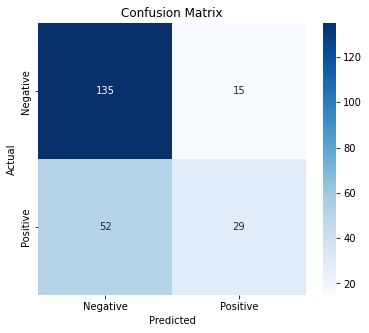

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       150
           1       0.66      0.36      0.46        81

    accuracy                           0.71       231
   macro avg       0.69      0.63      0.63       231
weighted avg       0.70      0.71      0.68       231

Akurasi: 71.00%


In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Print akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2%}")
